In [29]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn



# Define the Dataset

housing  = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

print(df.head())
print("\n", df.shape)



   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]

 (20640, 9)


In [30]:
# Initialize the Variables

X = df.drop('Target', axis=1)
y = df['Target']


In [31]:
# Split the dat into Train & Test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X Train :", X_train.shape)
print("Shape of X Test :", X_test.shape)
print("Shape of y Train :", y_train.shape)
print("Shape of y Test :", y_test.shape)


Shape of X Train : (14448, 8)
Shape of X Test : (6192, 8)
Shape of y Train : (14448,)
Shape of y Test : (6192,)


## Correlation

In [32]:
# Find out the correlation

Correlation = df.corr()
Correlation


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


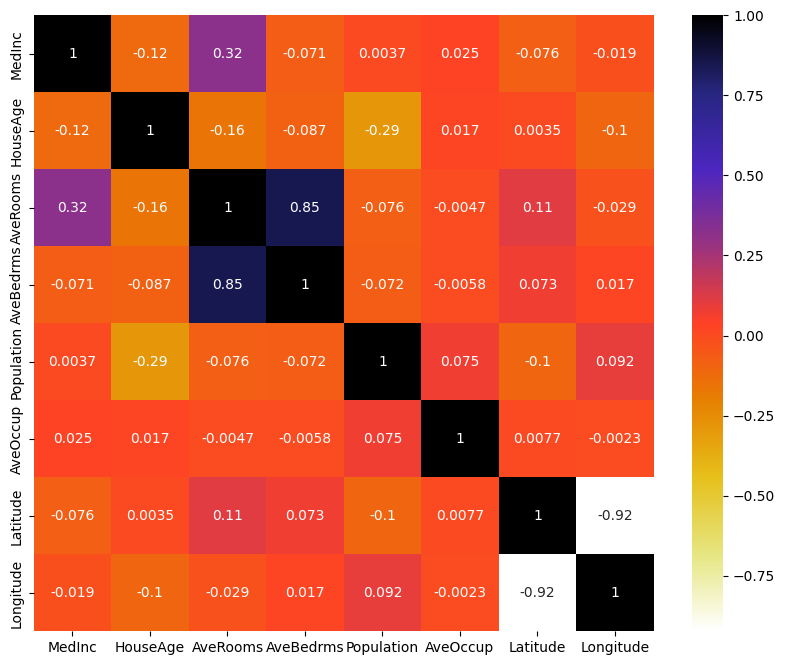

In [33]:
# Pearson Correlation

Corr = X_train.corr()

plt.figure(figsize=(10,8))
sn.heatmap(Corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [34]:
# Create a function to find the columns with high Correlation


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [35]:
# Call the Function

Corr_Features = correlation(X_train, 0.7)

print(Corr_Features)

print("\n",len(set(Corr_Features)))


{'Longitude', 'AveBedrms'}

 2


To avoid overfitting, we first identify and remove zero-variance features only from X_train. Once identified, we apply the same feature removal to both X_train and X_test to maintain consistency during model training and evaluation.

✅ This ensures:

Only X_train influences feature selection (prevents data leakage)

Same features are removed from both datasets (keeps them aligned)


In [36]:
# Drop the Features

X_train.drop(Corr_Features, axis=1, inplace=True)
X_test.drop(Corr_Features, axis=1, inplace=True)

print("Shape of X Train :", X_train.shape)
print("Shape of X Test :", X_test.shape)


Shape of X Train : (14448, 6)
Shape of X Test : (6192, 6)


## Let's Try it with Large Datset

In [22]:
# Upload the Dataset

from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [37]:
# Define the Dataset

df = pd.read_csv('train.csv')

print(df.head())
print("\n", df.shape)


   ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0   1     2     23  ...                     0.0   39205.170000       0
1   3     2     34  ...                     0.0   49278.030000       0
2   4     2     23  ...                     0.0   67333.770000       0
3   8     2     37  ...                     0.0   64007.970000       0
4  10     2     39  ...                     0.0  117310.979016       0

[5 rows x 371 columns]

 (76020, 371)


In [38]:
# Initialize the Variable

X = df.drop('TARGET', axis=1)
y = df['TARGET']


In [39]:
# Split the Dataset ino Train & Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X Train :", X_train.shape)
print("Shape of X Test :", X_test.shape)
print("Shape of y Train :", y_train.shape)
print("Shape of y Test :", y_test.shape)


Shape of X Train : (53214, 370)
Shape of X Test : (22806, 370)
Shape of y Train : (53214,)
Shape of y Test : (22806,)


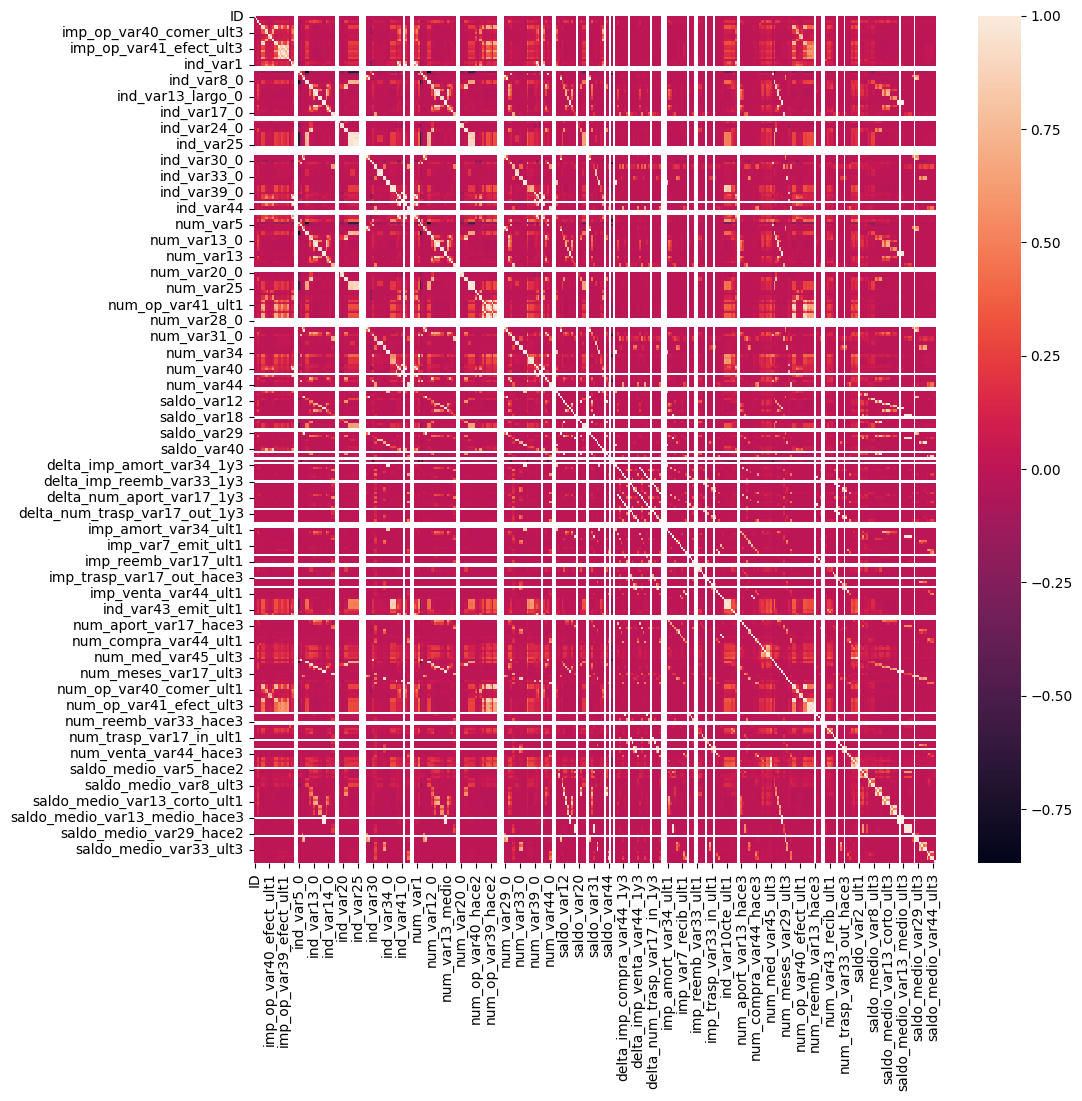

In [40]:
# Pearson Correlation

Corr = X_train.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sn.heatmap(Corr)

plt.show()


In [41]:
# Call the function to find the columns with high Correlation

Correlation_Features = correlation(X_train, 0.8)

print(Correlation_Features)

print("\n",len(set(Correlation_Features)))


{'num_venta_var44_hace3', 'imp_op_var39_ult1', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_medio_ult3', 'num_var33', 'num_meses_var13_medio_ult3', 'saldo_medio_var13_largo_ult1', 'num_var13_corto_0', 'saldo_medio_var13_corto_ult3', 'num_aport_var33_ult1', 'num_meses_var13_corto_ult3', 'delta_num_aport_var13_1y3', 'ind_var10cte_ult1', 'num_var13', 'ind_var8_0', 'delta_num_reemb_var17_1y3', 'num_meses_var17_ult3', 'num_var12_0', 'saldo_var13_medio', 'ind_var32', 'saldo_var32', 'num_var13_medio_0', 'saldo_medio_var13_medio_ult1', 'num_var31_0', 'num_meses_var13_largo_ult3', 'num_op_var40_efect_ult3', 'num_op_var39_hace2', 'num_var44', 'ind_var13_corto', 'num_var20_0', 'num_var5_0', 'num_var31', 'ind_var13', 'num_trasp_var17_in_ult1', 'imp_op_var39_efect_ult1', 'saldo_medio_var33_hace2', 'imp_venta_var44_ult1', 'ind_var33', 'num_var40_0', 'saldo_medio_var33_ult1', 'ind_var24', 'num_var39', 'ind_var30', 'saldo_medio_var13_medio_hace2', 'imp_op_var41_comer_ult1', 'ind_var13_largo', 'n

To avoid overfitting, we first identify and remove zero-variance features only from X_train. Once identified, we apply the same feature removal to both X_train and X_test to maintain consistency during model training and evaluation.

✅ This ensures:

Only X_train influences feature selection (prevents data leakage)

Same features are removed from both datasets (keeps them aligned)


In [42]:
# Drop the Correlation Features

X_train.drop(Correlation_Features, axis=1, inplace=True)
X_test.drop(Correlation_Features, axis=1, inplace=True)

print("Shape of X Train :", X_train.shape)
print("Shape of X Test :", X_test.shape)


Shape of X Train : (53214, 176)
Shape of X Test : (22806, 176)
